In [34]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm import tqdm
TC = 30
# --- 1. 데이터 준비 ---
df = pd.read_csv(f"./data/result_O2_{TC}C_2024nahyeon_ver.csv")
P = np.array([0.001, 0.5, 1, 5, 15])       # bar
P = np.array([0.001, 0.5, 1, 5])       # bar

# --- 2. 모델 함수 정의 ---
def langmuir(P, qmax, b):
    return qmax * b * P / (1 + b * P)

def freundlich(P, Kf, n):
    return Kf * P**(1/n)

def quadratic(P, a, b, c):
    return a * P**2 + b * P + c

def sips(P, qmax, b, n):
    return qmax * (b * P**n) / (1 + b * P**n)

model_funcs = {
    'Langmuir': langmuir,
    'Freundlich': freundlich,
    'Quadratic': quadratic,
    'Sips': sips
}

# --- 3. 결과 저장용 컨테이너 ---
rmse_dict   = {name: [] for name in model_funcs}
best_models = []
best_params = []

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# --- 4. 각 행마다 피팅 (진행바 표시) ---
for _, row in tqdm(df.iterrows(), total=len(df), desc="fitting rows"):
        # 1) sanitize strings: collapse multiple dots into one
    raw = row.iloc[1:].astype(str).str.replace(r"\.+", ".", regex=True)
    # 2) parse floats (bad entries → NaN)
    q = pd.to_numeric(raw, errors="coerce").values

    # 모델별 초기 추정 파라미터
    p0s = {
        'Langmuir':   [q.max(),       1.0],
        'Freundlich': [1.0,           2.0],
        'Quadratic':  [1.0, 1.0,      0.0],
        'Sips':       [q.max(),       1.0, 1.0]
    }

    fit_results = {}
    for name, func in model_funcs.items():
        try:
            popt, _ = curve_fit(func, P, q, p0=p0s[name], maxfev=10000)
            fit_results[name] = {
                'rmse':   rmse(q, func(P, *popt)),
                'params': popt
            }
        except RuntimeError:
            fit_results[name] = {'rmse': np.nan, 'params': None}

    # RMSE 수집
    for name in model_funcs:
        rmse_dict[name].append(fit_results[name]['rmse'])

    # 최적 모델 선택
    valid = {n: v for n, v in fit_results.items() if not np.isnan(v['rmse'])}
    best_name, best_info = min(valid.items(), key=lambda x: x[1]['rmse'])
    best_models.append(best_name)
    best_params.append(best_info['params'])

# --- 5. DataFrame에 결과 컬럼 추가 ---
for name in model_funcs:
    df[f"RMSE_{name}"] = rmse_dict[name]
df["best_model"]  = best_models
df["best_params"] = best_params  # numpy array 형태

# --- 6. 저장 또는 확인 ---
df.to_csv("./data/result_O2_with_fits.csv", index=False)
print(f"Done! 결과가 ./data/result_O2_with_fits_{TC}C.csv 에 저장되었습니다.")


fitting rows:   5%|▍         | 285/5760 [00:03<00:54, 101.19it/s]C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\3660103172.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:   7%|▋         | 391/5760 [00:06<01:34, 57.08it/s] C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\3660103172.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:   7%|▋         | 404/5760 [00:06<01:43, 51.74it/s]C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\3660103172.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:  12%|█▏        | 692/5760 [00:10<01:16, 66.19it/s] C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\3660103172.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:  18%|█▊        | 1038/5760 [00:13<00:54, 87.09it/s]C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\3660103172.py:16: RuntimeWarning: overflow encountere

Done! 결과가 ./data/result_O2_with_fits_30C.csv 에 저장되었습니다.


In [35]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm import tqdm
TC = 40
# --- 1. 데이터 준비 ---
df = pd.read_csv(f"./data/result_O2_{TC}C_2024nahyeon_ver.csv")
P = np.array([0.001, 0.5, 1, 5, 15])       # bar
P = np.array([0.001, 0.5, 1, 5])       # bar

# --- 2. 모델 함수 정의 ---
def langmuir(P, qmax, b):
    return qmax * b * P / (1 + b * P)

def freundlich(P, Kf, n):
    return Kf * P**(1/n)

def quadratic(P, a, b, c):
    return a * P**2 + b * P + c

def sips(P, qmax, b, n):
    return qmax * (b * P**n) / (1 + b * P**n)

model_funcs = {
    'Langmuir': langmuir,
    'Freundlich': freundlich,
    'Quadratic': quadratic,
    'Sips': sips
}

# --- 3. 결과 저장용 컨테이너 ---
rmse_dict   = {name: [] for name in model_funcs}
best_models = []
best_params = []

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# --- 4. 각 행마다 피팅 (진행바 표시) ---
for _, row in tqdm(df.iterrows(), total=len(df), desc="fitting rows"):
        # 1) sanitize strings: collapse multiple dots into one
    raw = row.iloc[1:].astype(str).str.replace(r"\.+", ".", regex=True)
    # 2) parse floats (bad entries → NaN)
    q = pd.to_numeric(raw, errors="coerce").values

    # 모델별 초기 추정 파라미터
    p0s = {
        'Langmuir':   [q.max(),       1.0],
        'Freundlich': [1.0,           2.0],
        'Quadratic':  [1.0, 1.0,      0.0],
        'Sips':       [q.max(),       1.0, 1.0]
    }

    fit_results = {}
    for name, func in model_funcs.items():
        try:
            popt, _ = curve_fit(func, P, q, p0=p0s[name], maxfev=10000)
            fit_results[name] = {
                'rmse':   rmse(q, func(P, *popt)),
                'params': popt
            }
        except RuntimeError:
            fit_results[name] = {'rmse': np.nan, 'params': None}

    # RMSE 수집
    for name in model_funcs:
        rmse_dict[name].append(fit_results[name]['rmse'])

    # 최적 모델 선택
    valid = {n: v for n, v in fit_results.items() if not np.isnan(v['rmse'])}
    best_name, best_info = min(valid.items(), key=lambda x: x[1]['rmse'])
    best_models.append(best_name)
    best_params.append(best_info['params'])

# --- 5. DataFrame에 결과 컬럼 추가 ---
for name in model_funcs:
    df[f"RMSE_{name}"] = rmse_dict[name]
df["best_model"]  = best_models
df["best_params"] = best_params  # numpy array 형태

# --- 6. 저장 또는 확인 ---
df.to_csv("./data/result_O2_with_fits.csv", index=False)
print(f"Done! 결과가 ./data/result_O2_with_fits_{TC}C.csv 에 저장되었습니다.")


fitting rows:   0%|          | 1/5760 [00:00<09:39,  9.94it/s]C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\4029269159.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:  21%|██        | 1189/5760 [00:18<00:40, 112.86it/s]C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\4029269159.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:  27%|██▋       | 1583/5760 [00:23<00:41, 100.68it/s]C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\4029269159.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:  40%|███▉      | 2292/5760 [00:33<00:52, 66.47it/s] C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\4029269159.py:16: RuntimeWarning: overflow encountered in power
  return Kf * P**(1/n)
fitting rows:  40%|████      | 2315/5760 [00:34<00:56, 61.36it/s]C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_82600\4029269159.py:16: RuntimeWarning: overflow encounter

Done! 결과가 ./data/result_O2_with_fits_40C.csv 에 저장되었습니다.


(array([5532.,    0.,    0.,    0.,    0.,  181.,    0.,    0.,    0.,
          47.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

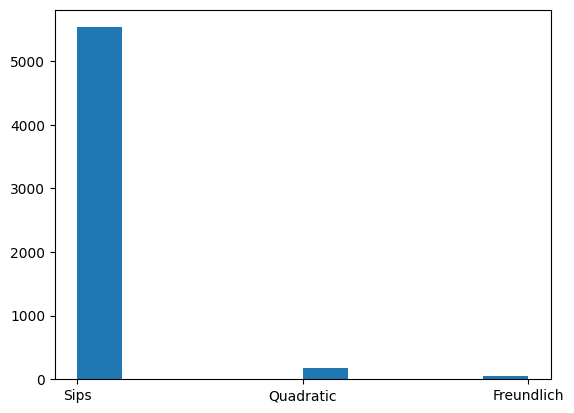

In [31]:
plt.hist(pd.read_csv("result_O2_with_fits.csv")["best_model"])